# Search: Solving a Maze Using a Goal-based Agent

Student Name: Jadon Swearingen

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: JS

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [40]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [41]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)
print(len(maze))
# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])
print("Position(1,1):\\"+ maze[1, 1] + '\\')
print("Position(3,11):", maze[3, 11])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

10
Position(0,0): X
Position(1,1):\ \
Position(3,11): S
Position(8,1): G


A helper function to visualize the maze is also available.

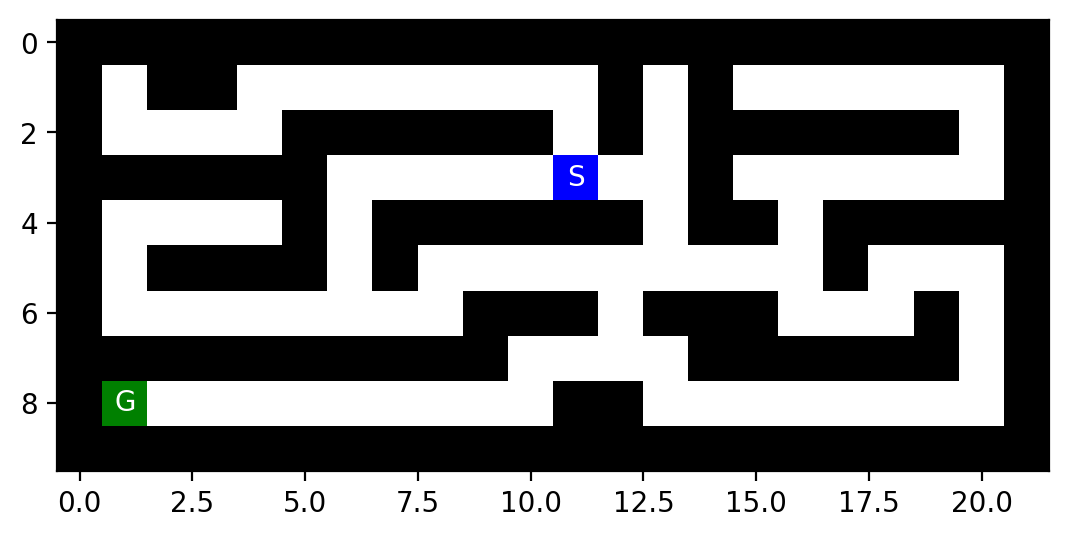

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [43]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [44]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\jadon\coding\ai\assignment2\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [45]:
class Node:
    def __init__(self, pos, parent, action, cost, heuristic = 0):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.heuristic = heuristic #for astar and greedy

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return path

    def __lt__(self, other):
        """less than comparison based on the cost of the nodes"""
        # return self.heuristic < other.heuristic
        if(self.heuristic < other.heuristic):
            return True
        elif(self.heuristic > other.heuristic):
            return False
        else:
            return self.cost >  other.cost

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

The initial state is the starting position, which is just a coordinate, like (0,0) for the top left corner.

The actions are the availiable moves, in this case north, east, south, and west. If there were, for example, a teleporter, that would be another availiable move.

The transition model is the model from each state, given an action, for every state and action. For example, it will list the result of all possible actions for each state, like for (0,0) East will be (0,1), South will be (1,0), West is invalid, and North is invalid.

The Goal state is a position such as (5,5) where we are trying to reach.

The Path cost, in this case, is the number actions necessary to reach the goal state given a specific set of actions. In other mazes, there might be weights associated with these actions that would need to be taken into account.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

n, the state space size, is just nxn - the number of invalid states, so it is just the number of open squares, becuase those are the only possible states

d, the depth of the optimal solution, is equal to the distance of the goal from the start state. This can be determined by a variety of search algorithms, such as BFS, which is guarunteed to find the optimal solution

m, the maximum depth of tree, is the longest path from the initial state to any other state. This can be determined by performing DFS to completion and keeping track of the longest depth. If there are loops, m is infinite.

b the maximum branching factor is the number of possbile new frontier states from a single node. In this case, since there are only 4 actions, the maximum branching factor is 4

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DFS can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DFS is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

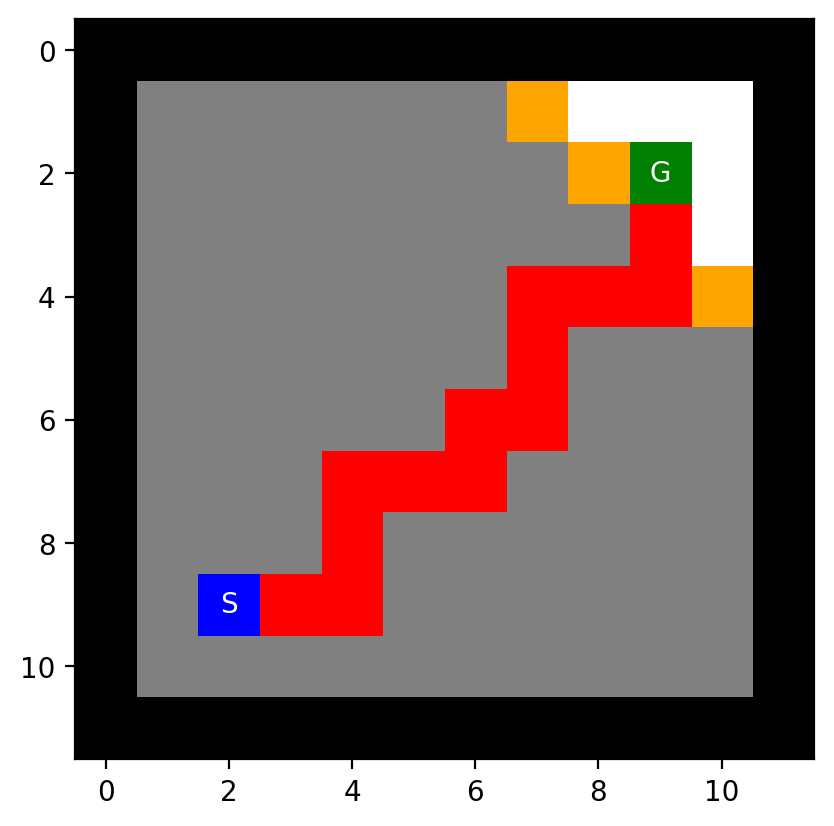

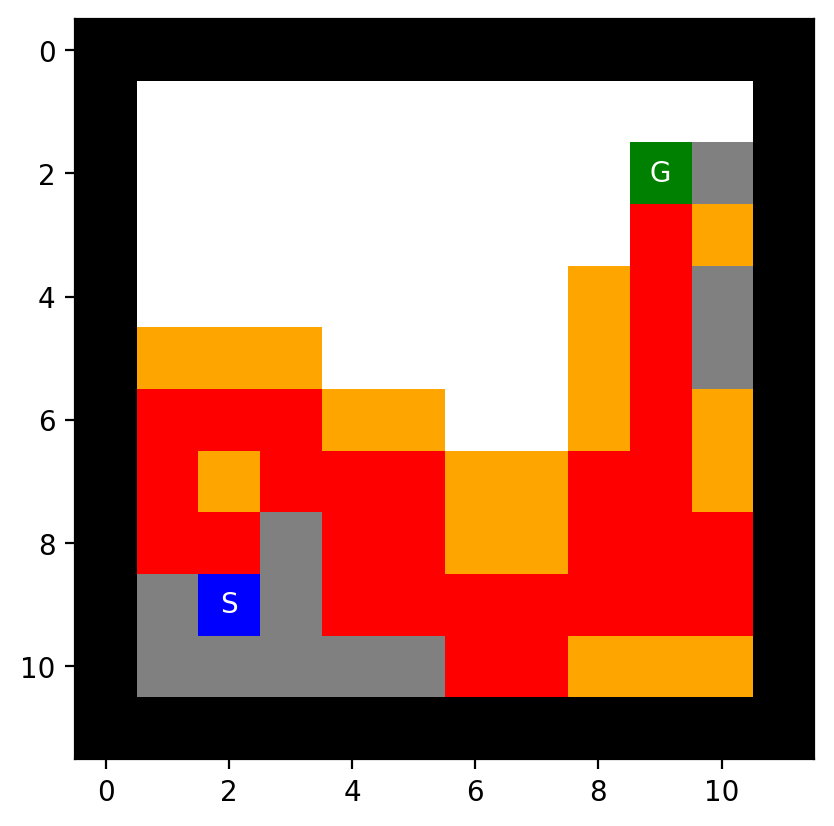

In [46]:

import queue
from collections import deque
import random
def getManhattan(maze,coordinates):
    goal = mh.find_pos(maze,"G")
    return abs(coordinates[0] - goal[0]) + abs(coordinates[1] - goal[1])

def getNextNodes(node, maze):
    #check all directions, return an array of possible moves
    nodes = []
    pos = node.pos
    row = pos[0]
    col = pos[1]
    if(pos[0] > 0 and mh.look(maze,(row-1,col)) in "G "):
        newNode = Node((row-1,col),node,"North",node.cost+1,getManhattan(maze,(node.pos[0]-1,node.pos[1])))
        nodes.append(newNode)
    if(pos[0] < len(maze)-1 and mh.look(maze,(row+1,col)) in "G "):
        newNode = Node((row+1,col),node,"South",node.cost+1,getManhattan(maze,(node.pos[0]+1,node.pos[1])))
        nodes.append(newNode)
    if(pos[1] > 0 and mh.look(maze,(row,col-1)) in "G "):
        newNode = Node((row,col-1),node,"West",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]-1)))
        nodes.append(newNode)
    if(pos[1] < len(maze[0])-1 and mh.look(maze,(row,col+1)) in "G "):
        newNode = Node((row,col+1),node,"East",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]+1)))
        nodes.append(newNode)
    random.shuffle(nodes)
    return nodes

def BreadthFirstSearch(maze, showMap = False):
    
    pathCost = 0
    numofNodesExpanded = 0
    maxTreeDepth = 0
    maxNumberOfNodesInMemory = 0
    maxFrontierSize = 0 #done
    
    frontierSize = 0
    
    startNode = mh.find_pos(maze,"S")
    startNode = Node(startNode,None,None,0,0)
    if(maze[startNode.pos] == "G"):
        return (startNode,pathCost,maxTreeDepth,numofNodesExpanded,maxNumberOfNodesInMemory,maxFrontierSize)
    frontier = queue.Queue()
    frontier.put(startNode)
    frontierSize+=1
    maxFrontierSize = frontierSize
    explored = set()
    while(not frontier.empty()):
        nextNode = frontier.get()
        frontierSize-=1
        
        if(nextNode.pos in explored):
            continue
        explored.add(nextNode.pos)
        
        actions = getNextNodes(nextNode,maze)
        for action in actions:
            if(not(action.pos in explored)):
                if(maze[action.pos] == "G"):
                    if(showMap):
                        while(not frontier.empty()):
                            maze[frontier.get().pos] = "F"
                        for i in explored:
                            maze[i] = "."
                        for i in action.get_path_from_root():
                            maze[i.pos] = "P"
                        maze[action.get_path_from_root()[0].pos] = 'S'
                        maze[action.get_path_from_root()[-1].pos] = 'G'
                        mh.show_maze(maze)
                    pathCost = action.cost
                    numofNodesExpanded = len(explored)
                    maxNumberOfNodesInMemory = numofNodesExpanded + maxFrontierSize
                    # print("PathCost", pathCost, "NumOfNodesExpanded",numofNodesExpanded,"maxTreeDepth",maxTreeDepth,"MaxNumberOfNodesInMemory",maxNumberOfNodesInMemory,"maxFrontierSize",maxFrontierSize)
                    return (action,pathCost,numofNodesExpanded,maxTreeDepth,maxNumberOfNodesInMemory,maxFrontierSize)
                if(action.cost > maxTreeDepth):
                    maxTreeDepth = action.cost
                frontier.put(action)
                frontierSize += 1
                if(frontierSize > maxFrontierSize):
                    maxFrontierSize = frontierSize
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
answer = BreadthFirstSearch(maze,True)
    
    
def DepthFirstSearch(maze,cutoffAmount = 100, showMap = False):
    
    pathCost = 0
    numofNodesExpanded = 0
    maxTreeDepth = 0
    maxNumberOfNodesInMemory = 0
    maxFrontierSize = 0 #done
    
    frontierSize = 0
    
    startNode = mh.find_pos(maze,"S")
    startNode = Node(startNode,None,None,0,0)
    if(maze[startNode.pos] == "G"):
        return startNode
    frontier = deque()
    frontier.append(startNode)
    frontierSize += 1
    maxFrontierSize = frontierSize
    explored = set() #Because we are doing dfs, this is only for displayig if showMap is True
    while(not len(frontier) == 0):
        nextNode = frontier.pop()
        frontierSize-=1
        numofNodesExpanded+=1
        # explored.add(nextNode.pos)
        actions = getNextNodes(nextNode,maze)
        for action in actions:
            # if(not(action.pos in explored)):
            if(maze[action.pos] == "G"):
                if(showMap):
                    for i in explored:
                        maze[i] = "."
                    while(not len(frontier) == 0):
                        maze[frontier.pop().pos] = "F"
                    for i in action.get_path_from_root():
                        maze[i.pos] = "P"
                    maze[i.get_path_from_root()[0].pos] = 'S'
                    maze[i.get_path_from_root()[-1].pos] = 'G'
                    mh.show_maze(maze)
                pathCost = action.cost
                # numofNodesExpanded = len(explored)
                # maxNumberOfNodesInMemory = maxFrontierSize
                # print("PathCost", pathCost, "NumOfNodesExpanded",numofNodesExpanded,"maxTreeDepth",maxTreeDepth,"MaxNumberOfNodesInMemory",maxNumberOfNodesInMemory,"maxFrontierSize",maxFrontierSize)
                return (action,pathCost,numofNodesExpanded,maxTreeDepth,maxNumberOfNodesInMemory,maxFrontierSize)
            if(showMap):
                explored.add(action.pos)
            if(action.cost > maxTreeDepth):
                maxTreeDepth = action.cost
                
            if(not action.cost > cutoffAmount):
                path = nextNode.get_path_from_root()
                pathPositions = [node.pos for node in path]
                frontierPositions = [node.pos for node in frontier]
                if(action.pos not in pathPositions):
                    if action.pos in frontierPositions:
                        frontier = deque([node for node in frontier if node.pos != action.pos])
                        frontierSize -= 1
                    frontier.append(action)
                    frontierSize += 1
                    if(frontierSize > maxFrontierSize):
                        maxFrontierSize = frontierSize
                if(frontierSize + len(path) > maxNumberOfNodesInMemory):
                    maxNumberOfNodesInMemory = frontierSize + len(path)
    return False
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
answer = DepthFirstSearch(maze,30,True)
# print(answer)

How does BFS and DFS deal with loops (cycles)?

# Discussion
BFS deals with loops by keeping track of all explored nodes in a set, which prevents it from relooking at nodes.

DFS with the way I implemented cycle checking will recheck for every searched node if that node is in the path to the node. This is run for every node, but it does mean that there is less memory used because it gets rid of nodes after searching. It also checks if the next node is already in the frontier, and if so it will remove it from the frontier and add it to the end. It does mean that it has a longer run time.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

# Discussion
My BFS is optimal becuase it will always check from shortest path to longest path.
The DFS seach is not necessarily optimal, as shown by running the program with different directions checked in a random order. If it chooses a bad direction first, it won't find the optimal path, since it doesn't check every path that is shorter than the current one.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

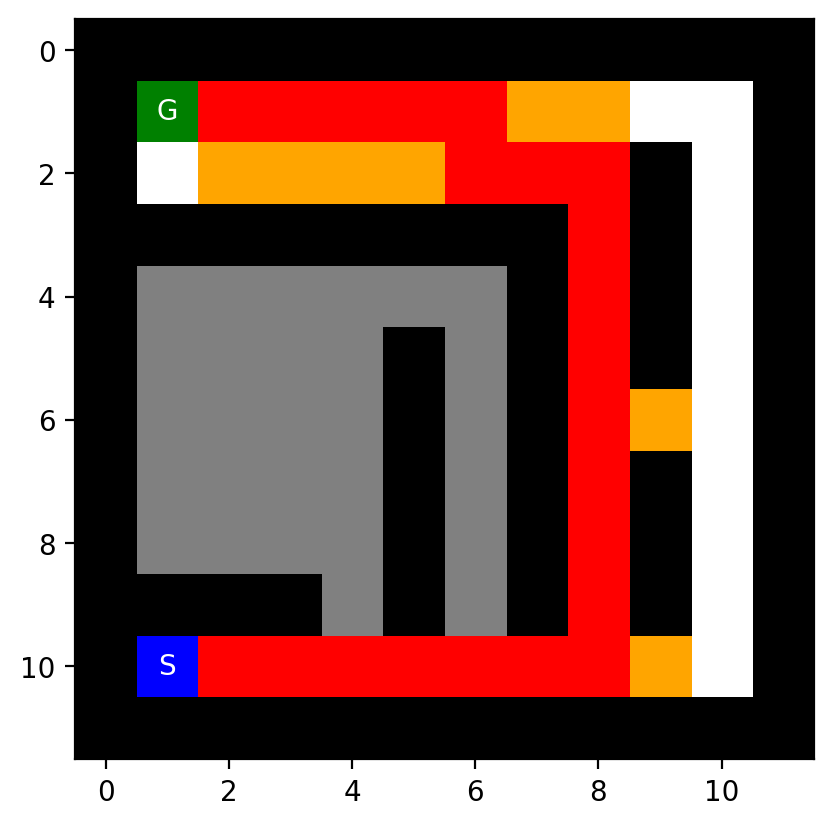

In [47]:
from queue import PriorityQueue
class NodeGreedy:
    def __init__(self, pos, parent, action, cost, heuristic = 0):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.heuristic = heuristic

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return path

    def __lt__(self, other):
        """less than comparison based on the cost of the nodes"""
        # return self.heuristic < other.heuristic
        if(self.heuristic < other.heuristic):
            return True
        elif(self.heuristic > other.heuristic):
            return False
        else:
            return self.cost < other.cost
        
def getNextNodesGreedy(node, maze):
    #check all directions, return an array of possible moves
    nodes = []
    pos = node.pos
    row = pos[0]
    col = pos[1]
    if(pos[0] > 0 and mh.look(maze,(row-1,col)) in "G "):
        newNode = NodeGreedy((row-1,col),node,"North",node.cost+1,getManhattan(maze,(node.pos[0]-1,node.pos[1])))
        nodes.append(newNode)
    if(pos[0] < len(maze)-1 and mh.look(maze,(row+1,col)) in "G "):
        newNode = NodeGreedy((row+1,col),node,"South",node.cost+1,getManhattan(maze,(node.pos[0]+1,node.pos[1])))
        nodes.append(newNode)
    if(pos[1] > 0 and mh.look(maze,(row,col-1)) in "G "):
        newNode = NodeGreedy((row,col-1),node,"West",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]-1)))
        nodes.append(newNode)
    if(pos[1] < len(maze[0])-1 and mh.look(maze,(row,col+1)) in "G "):
        newNode = NodeGreedy((row,col+1),node,"East",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]+1)))
        nodes.append(newNode)
    random.shuffle(nodes)
    return nodes



def GreedyBFS(maze, showMap = False):
    
    pathCost = 0
    numofNodesExpanded = 0
    maxTreeDepth = 0
    maxNumberOfNodesInMemory = 0
    maxFrontierSize = 0 #done
    
    frontierSize = 0
    
    
    startNode = mh.find_pos(maze,"S")
    startNode = NodeGreedy(startNode,None,None,0,getManhattan(maze,startNode))
    if(maze[startNode.pos] == "G"):
        return startNode
    frontier = PriorityQueue()
    frontier.put(startNode)
    frontierSize+=1
    maxFrontierSize = frontierSize
    explored = set() #Because we are doing Greedy, this is only for displayig if showMap is True
    while(not frontier.empty()):
        nextNode = frontier.get()
        frontierSize-=1
        numofNodesExpanded +=1
        # explored.add(nextNode.pos)
        if(showMap):
            explored.add(nextNode.pos)
        actions = getNextNodesGreedy(nextNode,maze)
        for action in actions:
            # if(not(action.pos in explored)):
            if(maze[action.pos] == "G"):
                if(showMap):
                    while(not frontier.empty()):
                        maze[frontier.get().pos] = "F"
                    for i in explored:
                        maze[i] = "."
                    for i in action.get_path_from_root():
                        maze[i.pos] = "P"
                    maze[i.get_path_from_root()[0].pos] = 'S'
                    maze[i.get_path_from_root()[-1].pos] = 'G'
                    mh.show_maze(maze)
                        
                pathCost = action.cost
                # numofNodesExpanded = len(explored)
                # maxNumberOfNodesInMemory = maxFrontierSize
                # print("PathCost", pathCost, "NumOfNodesExpanded",numofNodesExpanded,"maxTreeDepth",maxTreeDepth,"MaxNumberOfNodesInMemory",maxNumberOfNodesInMemory,"maxFrontierSize",maxFrontierSize)
                return (action,pathCost,numofNodesExpanded,maxTreeDepth,maxNumberOfNodesInMemory,maxFrontierSize)

            if(action.cost > maxTreeDepth):
                maxTreeDepth = action.cost
            # if(not action.cost > cutoffAmount):
            path = nextNode.get_path_from_root()
            pathPositions = [node.pos for node in path]
            frontierPositions = [node.pos for node in list(frontier.queue)]
            if(action.pos not in pathPositions and action.pos not in frontierPositions):
                frontier.put(action)
                frontierSize += 1
                if(frontierSize > maxFrontierSize):
                    maxFrontierSize = frontierSize
                    
            if(frontierSize + len(path) > maxNumberOfNodesInMemory):
                    maxNumberOfNodesInMemory = frontierSize + len(path)
                

with open("loops_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
answer = GreedyBFS(maze,True)
    

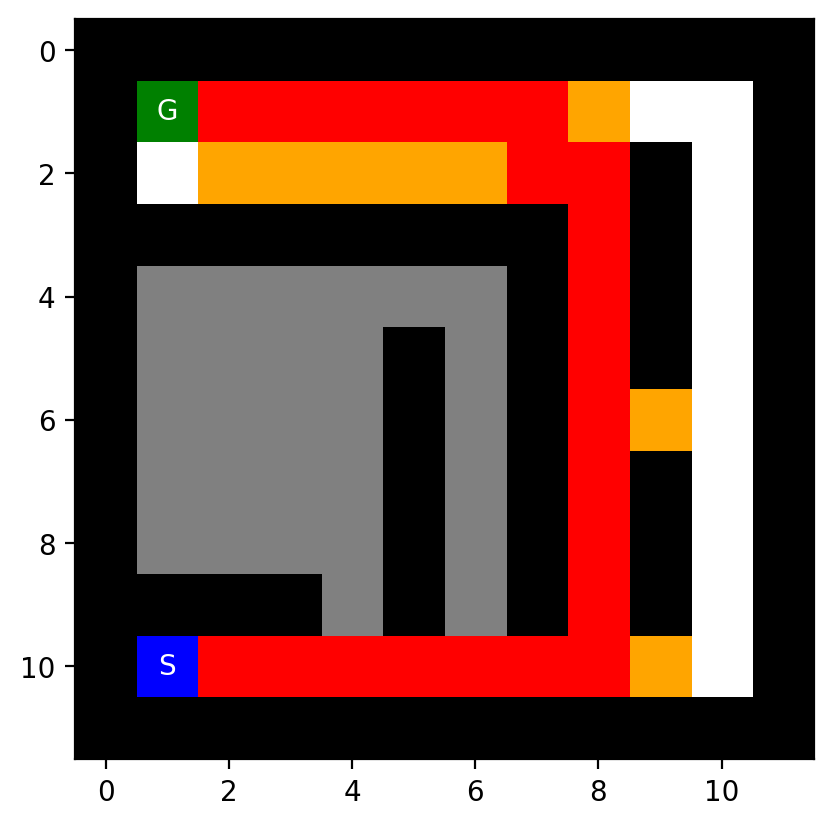

In [48]:
from queue import PriorityQueue
def getNextNodesAStar(node, maze):
    #check all directions, return an array of possible moves
    nodes = []
    pos = node.pos
    row = pos[0]
    col = pos[1]
    if(pos[0] > 0 and mh.look(maze,(row-1,col)) in "G "):
        newNode = Node((row-1,col),node,"North",node.cost+1,getManhattan(maze,(node.pos[0]-1,node.pos[1])) + node.cost+1)
        nodes.append(newNode)
    if(pos[0] < len(maze)-1 and mh.look(maze,(row+1,col)) in "G "):
        newNode = Node((row+1,col),node,"South",node.cost+1,getManhattan(maze,(node.pos[0]+1,node.pos[1])) + node.cost+1)
        nodes.append(newNode)
    if(pos[1] > 0 and mh.look(maze,(row,col-1)) in "G "):
        newNode = Node((row,col-1),node,"West",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]-1)) + node.cost+1)
        nodes.append(newNode)
    if(pos[1] < len(maze[0])-1 and mh.look(maze,(row,col+1)) in "G "):
        newNode = Node((row,col+1),node,"East",node.cost+1,getManhattan(maze,(node.pos[0],node.pos[1]+1)) + node.cost+1)
        nodes.append(newNode)
    random.shuffle(nodes)
    return nodes
# Your code goes here
def AStarSearch(maze, showMap = False):
    
    pathCost = 0
    numofNodesExpanded = 0
    maxTreeDepth = 0
    maxNumberOfNodesInMemory = 0
    maxFrontierSize = 0
    
    frontierSize = 0
    
    startNode = mh.find_pos(maze,"S")
    startNode = Node(startNode,None,None,0,getManhattan(maze,startNode) + 0)
    if(maze[startNode.pos] == "G"):
        return startNode
    frontier = PriorityQueue()
    frontier.put(startNode)
    frontierSize += 1
    maxFrontierSize = frontierSize
    explored = set() #just if showmap is true this is used
    while(not frontier.empty()):
        nextNode = frontier.get()
        frontierSize-=1
        numofNodesExpanded+=1
        # explored.add(nextNode.pos)
        if(showMap):
            explored.add(nextNode.pos)
        actions = getNextNodesAStar(nextNode,maze)
        for action in actions:
            if(not(action.pos in explored)):
                if(maze[action.pos] == "G"):
                    if(showMap):
                        while(not frontier.empty()):
                            maze[frontier.get().pos] = "F"
                        for i in explored:
                            maze[i] = "."
                        for i in action.get_path_from_root():
                            maze[i.pos] = "P"
                        maze[action.get_path_from_root()[0].pos] = 'S'
                        maze[action.get_path_from_root()[-1].pos] = 'G'
                        mh.show_maze(maze)
                    pathCost = action.cost
                    # numofNodesExpanded = len(explored)
                    # maxNumberOfNodesInMemory = maxFrontierSize
                    # print("PathCost", pathCost, "NumOfNodesExpanded",numofNodesExpanded,"maxTreeDepth",maxTreeDepth,"MaxNumberOfNodesInMemory",maxNumberOfNodesInMemory,"maxFrontierSize",maxFrontierSize)
                    return (action,pathCost,numofNodesExpanded,maxTreeDepth,maxNumberOfNodesInMemory,maxFrontierSize)
                if(action.cost > maxTreeDepth):
                    maxTreeDepth = action.cost
                path = nextNode.get_path_from_root()
                pathPositions = [node.pos for node in path]
                frontierPositions = [node.pos for node in list(frontier.queue)]
                if(action.pos not in pathPositions and action.pos not in frontierPositions):
                    frontier.put(action)
                    frontierSize += 1
                    if(frontierSize > maxFrontierSize):
                        maxFrontierSize = frontierSize
                if(frontierSize + len(path) > maxNumberOfNodesInMemory):
                    maxNumberOfNodesInMemory = frontierSize + len(path)
                

# with open("small_maze.txt", "r") as f:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
answer = AStarSearch(maze,True)
    

Are your implementations complete and optimal? What is the time and space complexity?

# Discussion GreedyBFS(maze, True)


The A* search is both optimal and complete (as long as the heuristic is admissible, which in my case it is becuase I give a lower bound for steps with it equal to steps travelled + min steps to go) The time complexity is O(b^d) where b is the branching factor and d is the depth of the solution. However, it normally has a lower branching factor than other implementations becuase the heuristic leads to lead it in a certain direction rather than actually testing all 4. The space complexity is O(b^d) also, since every visited node is kept in memory for visited checking.

The greedyBFS is not optimal, but it is complete. This is because the heruistic it uses is not admissible, but it will end up checking every state and in some situations leads to a good result.


## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [68]:
# Add code
# Add code
maze_files = [
    "open_maze.txt",
    "empty_2_maze.txt",
    "empty_maze.txt",
    "large_maze.txt",
    "loops_maze.txt",
    "L_maze.txt",
    "medium_maze.txt",
    "small_maze.txt",
    "wall_maze.txt"
]

for maze in maze_files:
    
    with open(maze, "r") as f:
        maze_str = f.read()
    print('__' + maze + "__")
    # print('\n')
    # print('\n')
    
    # print("Breadth First Search")
    maze = mh.parse_maze(maze_str)
    data = BreadthFirstSearch(maze,False)
    print('| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |\n|-----------|-----------|----------------|----------------|---------------|-------------------|')
    print('|BFS|',end='')
    for i in range(1,len(data)):
        print(str(data[i]) + '|', end='')
    print()
    
    # print("Depth First Search")
    maze = mh.parse_maze(maze_str)
    data = DepthFirstSearch(maze,1000,False)
    print('|DFS|',end='')
    for i in range(1,len(data)):
        print(str(data[i]) + '|', end='')
    print()
    
    # print("GreedyBFS  Search")
    maze = mh.parse_maze(maze_str)
    data = GreedyBFS(maze,False)
    print('|GreedyBFS|',end='')
    for i in range(1,len(data)):
        print(str(data[i]) + '|', end='')
    print()
    # print("AStarSearch  Search")
    maze = mh.parse_maze(maze_str)
    data = AStarSearch(maze,False)
    print('|AStarSearch|',end='')
    for i in range(1,len(data)):
        print(str(data[i]) + '|', end='')
    print('\n')

__open_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|54|679|53|727|48|
|DFS|224|583|279|351|78|
|GreedyBFS|56|2881|56|129|74|
|AStarSearch|54|174|54|154|100|

__empty_2_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|92|14|115|23|
|DFS|44|47|43|62|23|
|GreedyBFS|14|14|14|38|25|
|AStarSearch|14|14|13|34|21|

__empty_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|91|14|114|23|
|DFS|40|40|40|73|34|
|GreedyBFS|14|14|14|38|24|
|AStarSearch|14|14|14|33|20|

__large

__open_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|54|679|53|727|48|
|DFS|224|583|279|351|78|
|GreedyBFS|56|2881|56|129|74|
|AStarSearch|54|174|54|154|100|

__empty_2_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|92|14|115|23|
|DFS|44|47|43|62|23|
|GreedyBFS|14|14|14|38|25|
|AStarSearch|14|14|13|34|21|

__empty_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|91|14|114|23|
|DFS|40|40|40|73|34|
|GreedyBFS|14|14|14|38|24|
|AStarSearch|14|14|14|33|20|

__large_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|210|618|210|626|8|
|DFS|210|365|211|245|35|
|GreedyBFS|210|455|210|231|22|
|AStarSearch|210|539|209|218|13|

__loops_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|23|70|22|81|11|
|DFS|25|67|31|35|10|
|GreedyBFS|23|1301|31|35|17|
|AStarSearch|23|139|22|35|13|

__L_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|136|14|171|35|
|DFS|70|80|70|90|24|
|GreedyBFS|20|47|20|40|20|
|AStarSearch|14|17|14|40|26|

__medium_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|68|265|67|274|9|
|DFS|68|273|193|195|8|
|GreedyBFS|152|157|152|159|8|
|AStarSearch|68|247|67|74|12|

__small_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|19|91|19|100|9|
|DFS|19|33|18|24|6|
|GreedyBFS|29|39|29|33|5|
|AStarSearch|19|37|18|26|8|

__wall_maze.txt__
| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
|BFS|14|85|14|102|17|
|DFS|40|40|40|59|21|
|GreedyBFS|16|49|16|38|23|
|AStarSearch|14|21|14|37|23|



Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

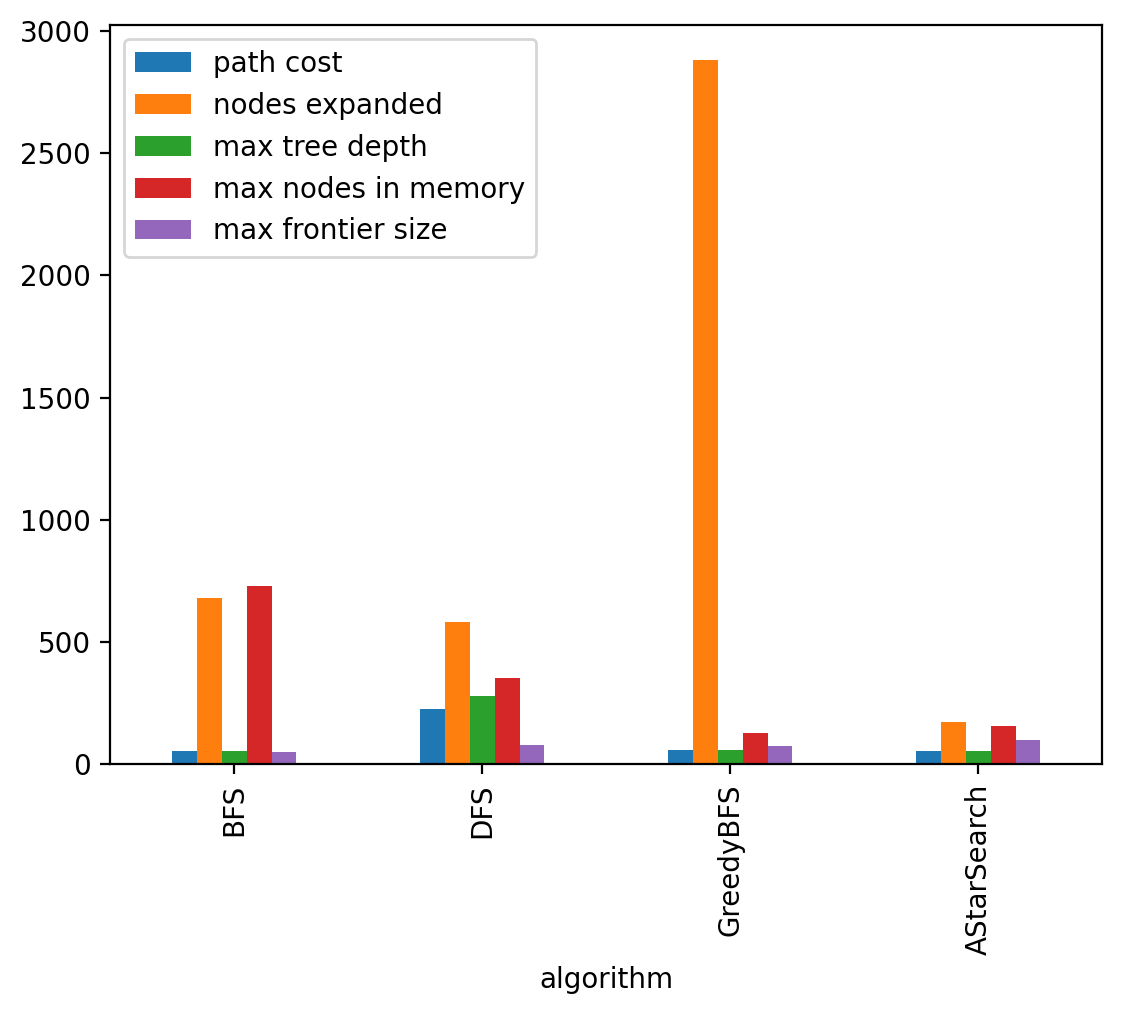

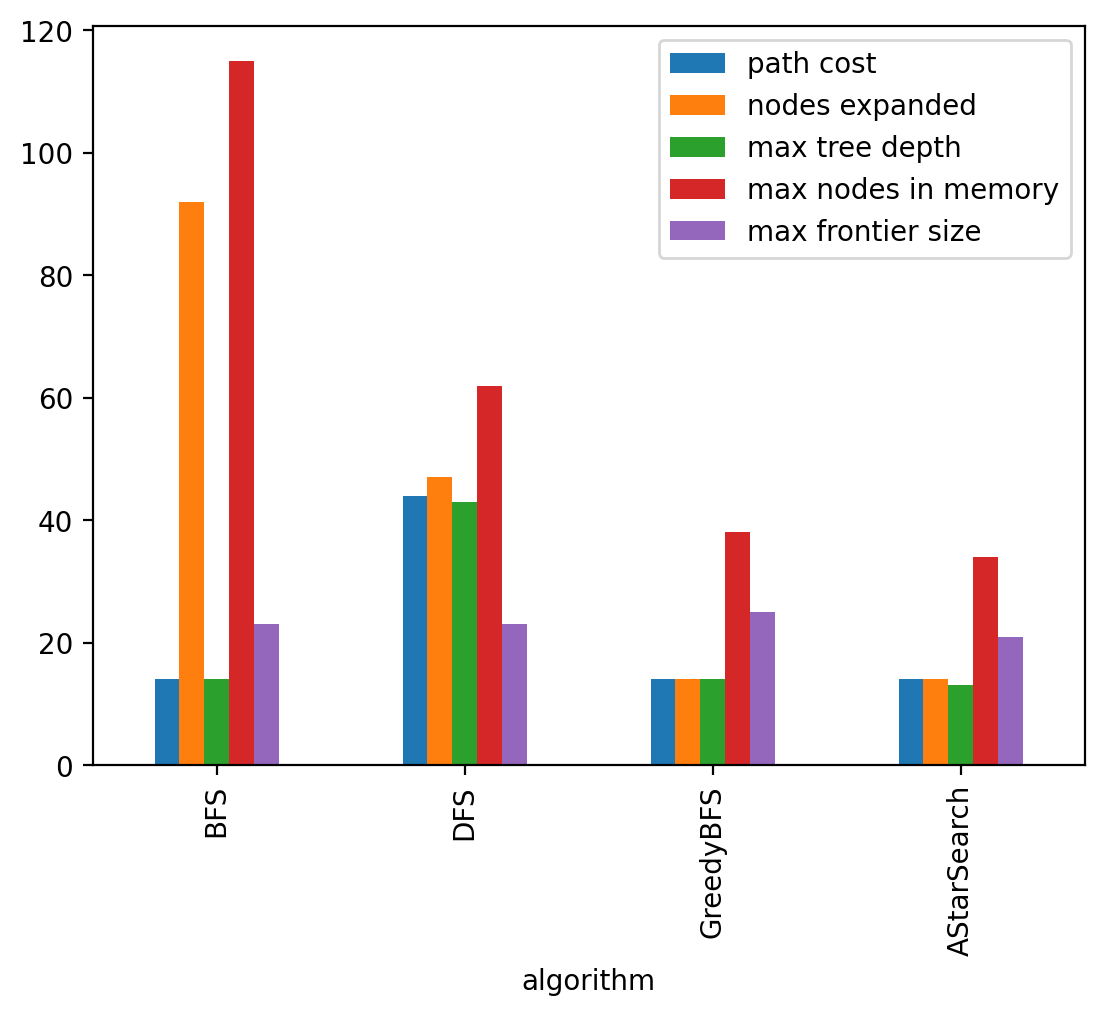

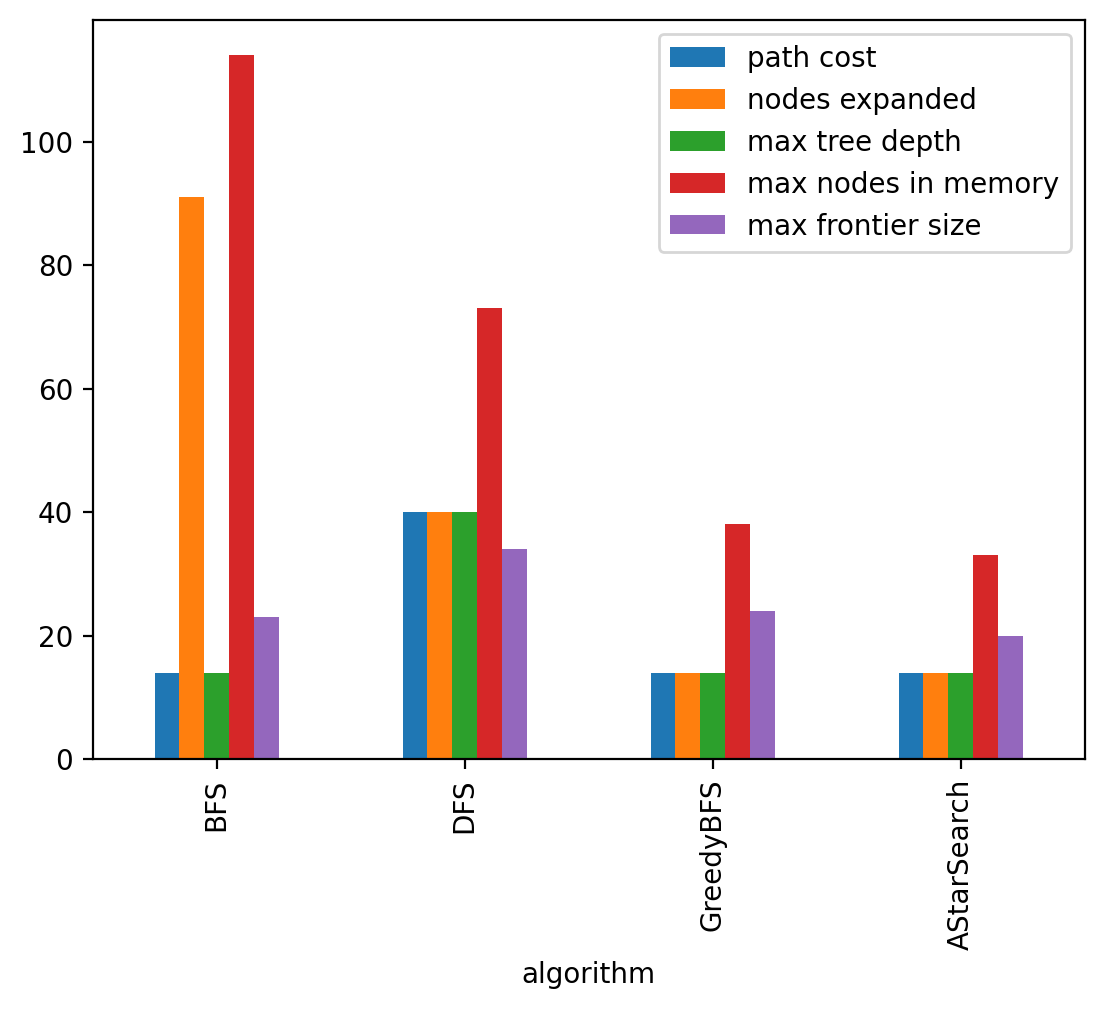

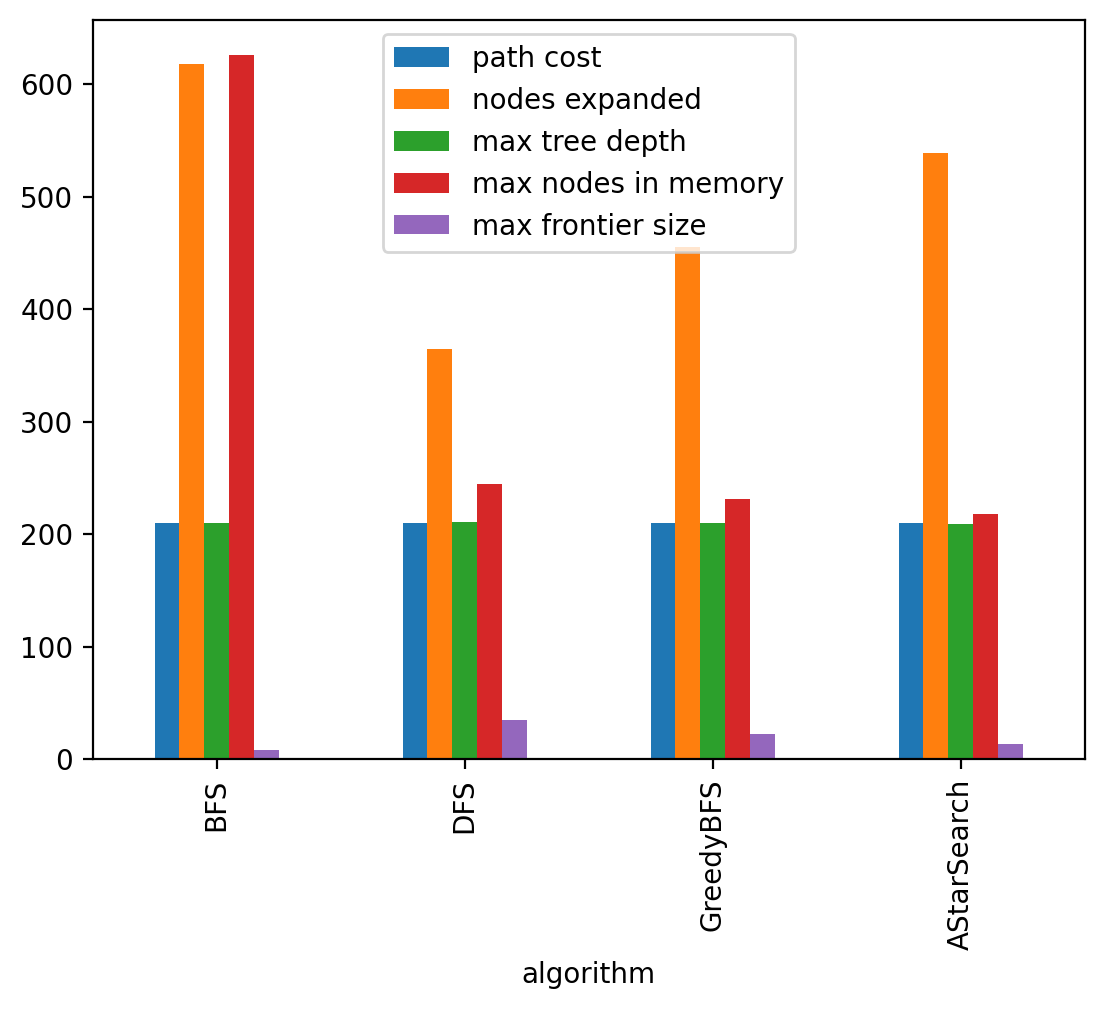

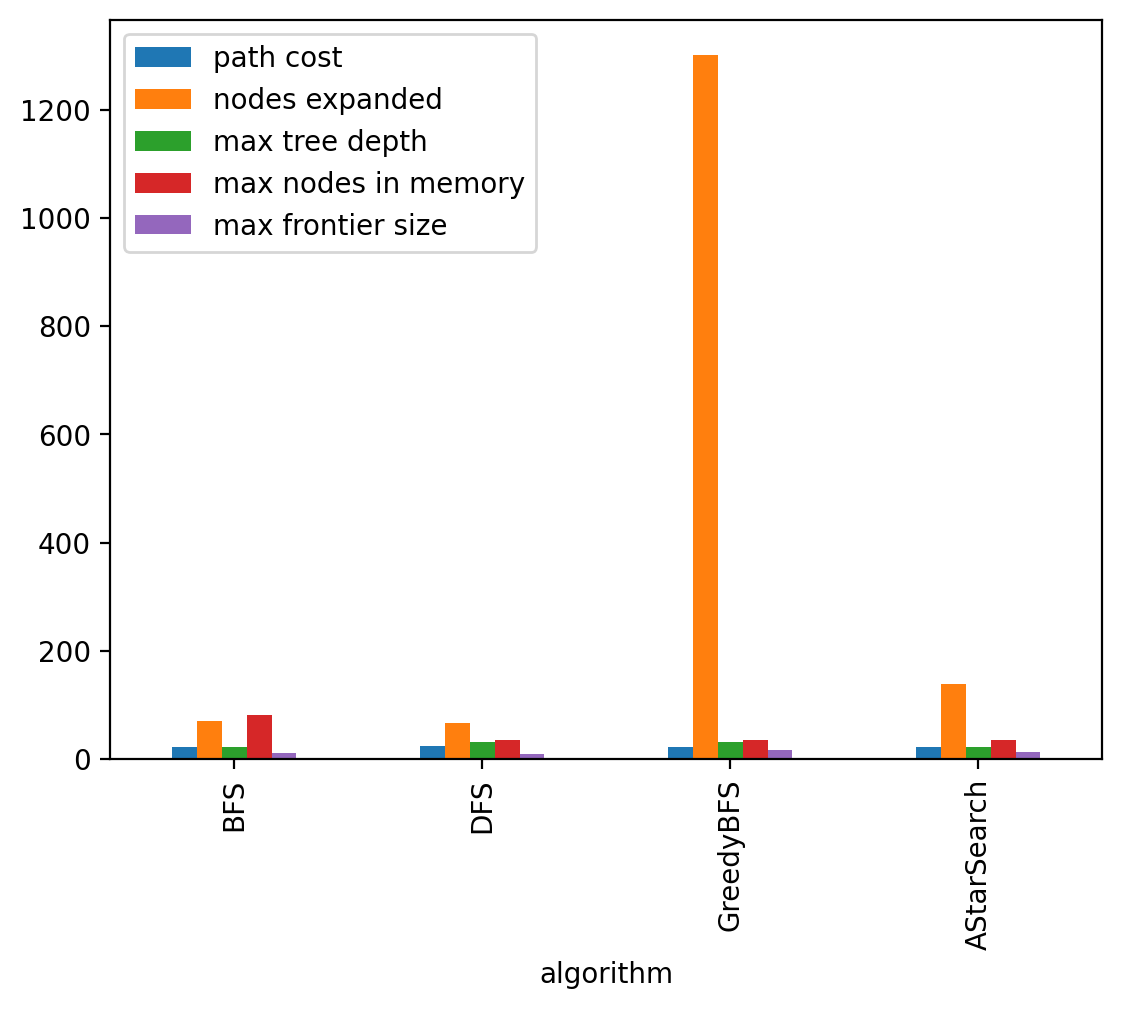

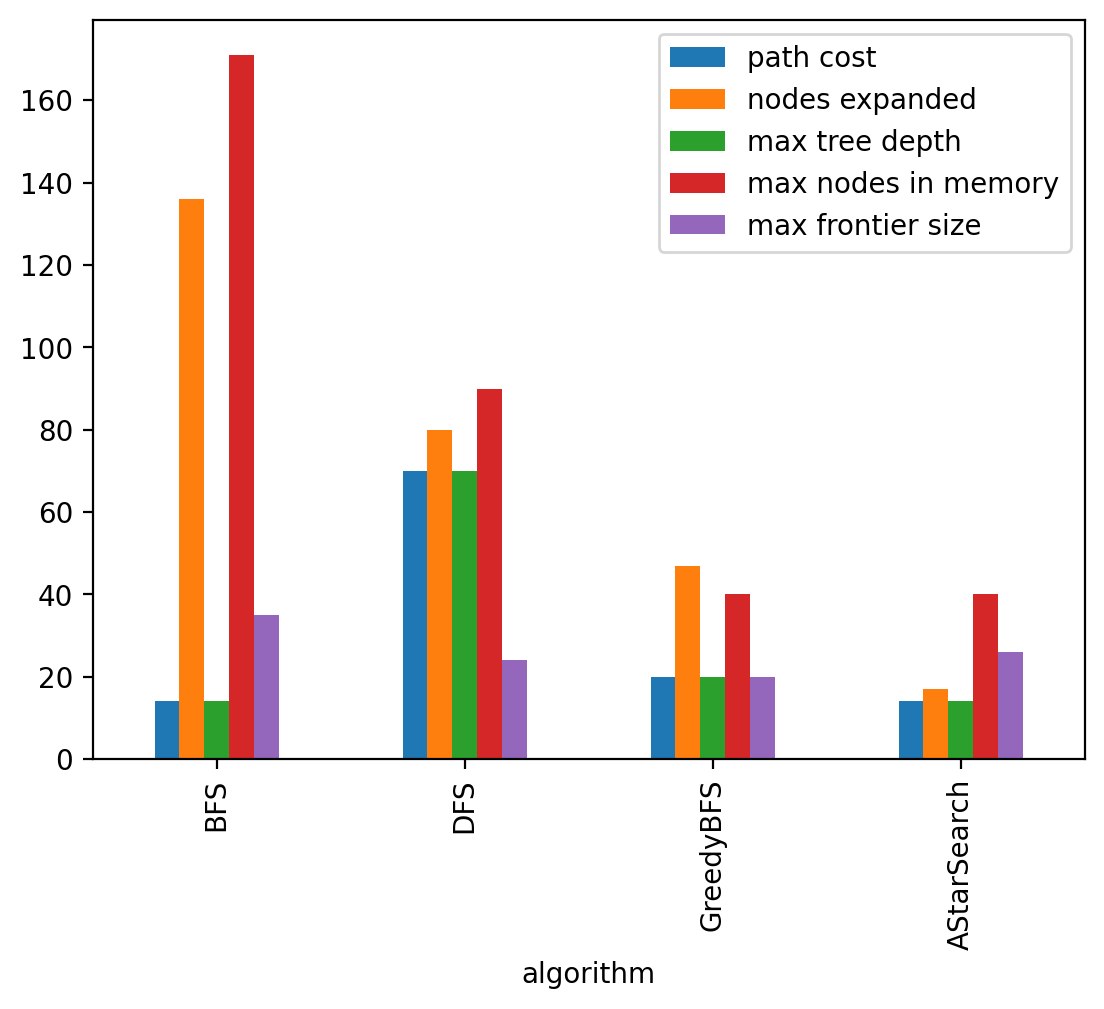

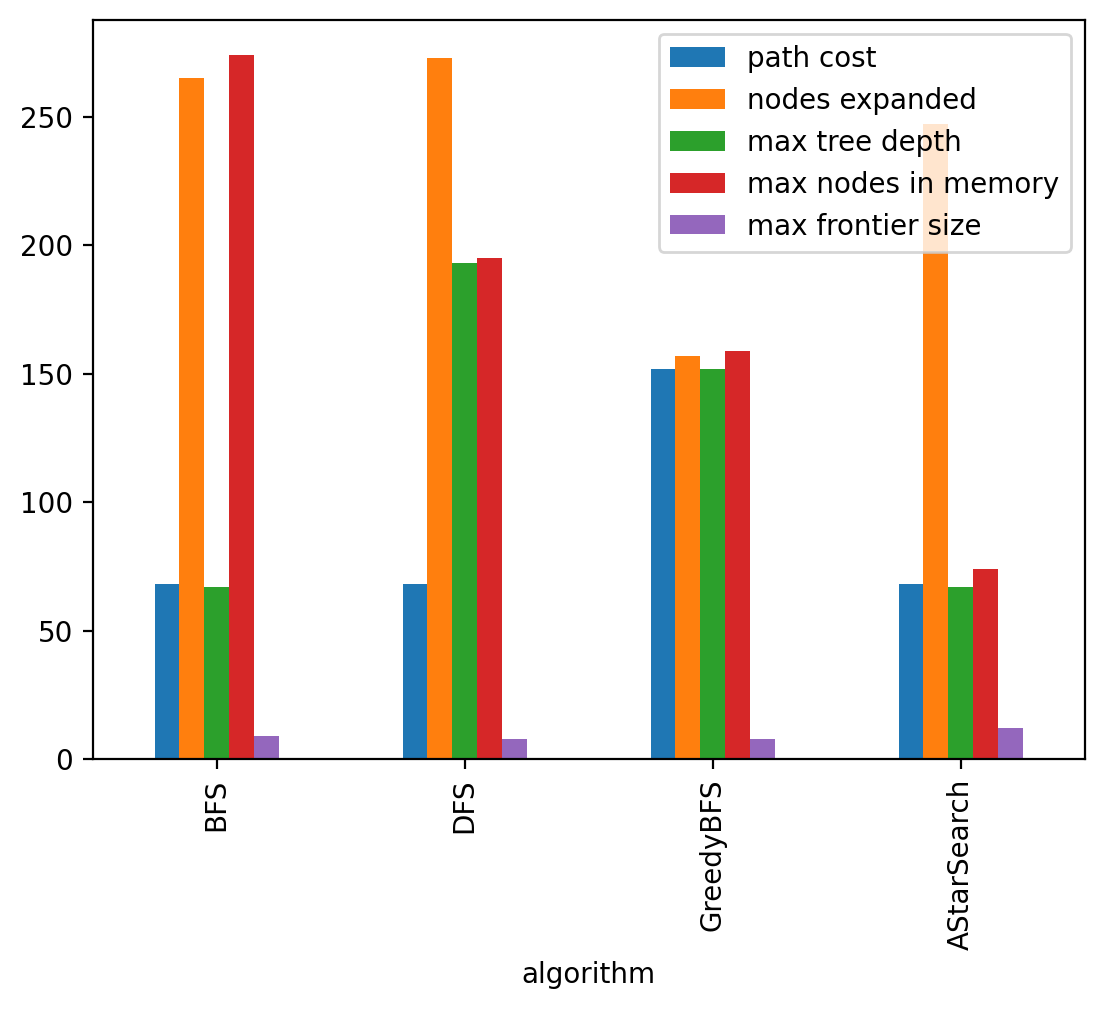

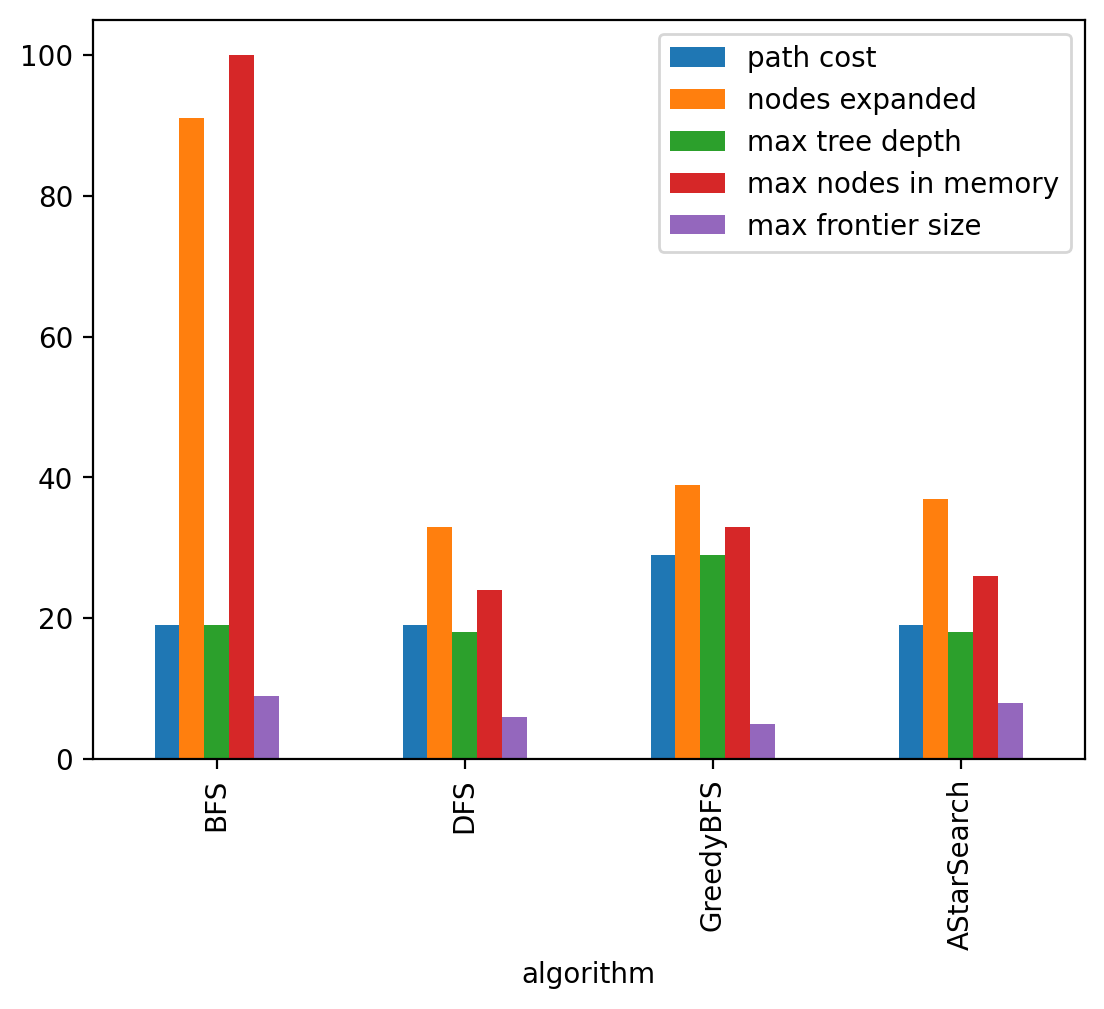

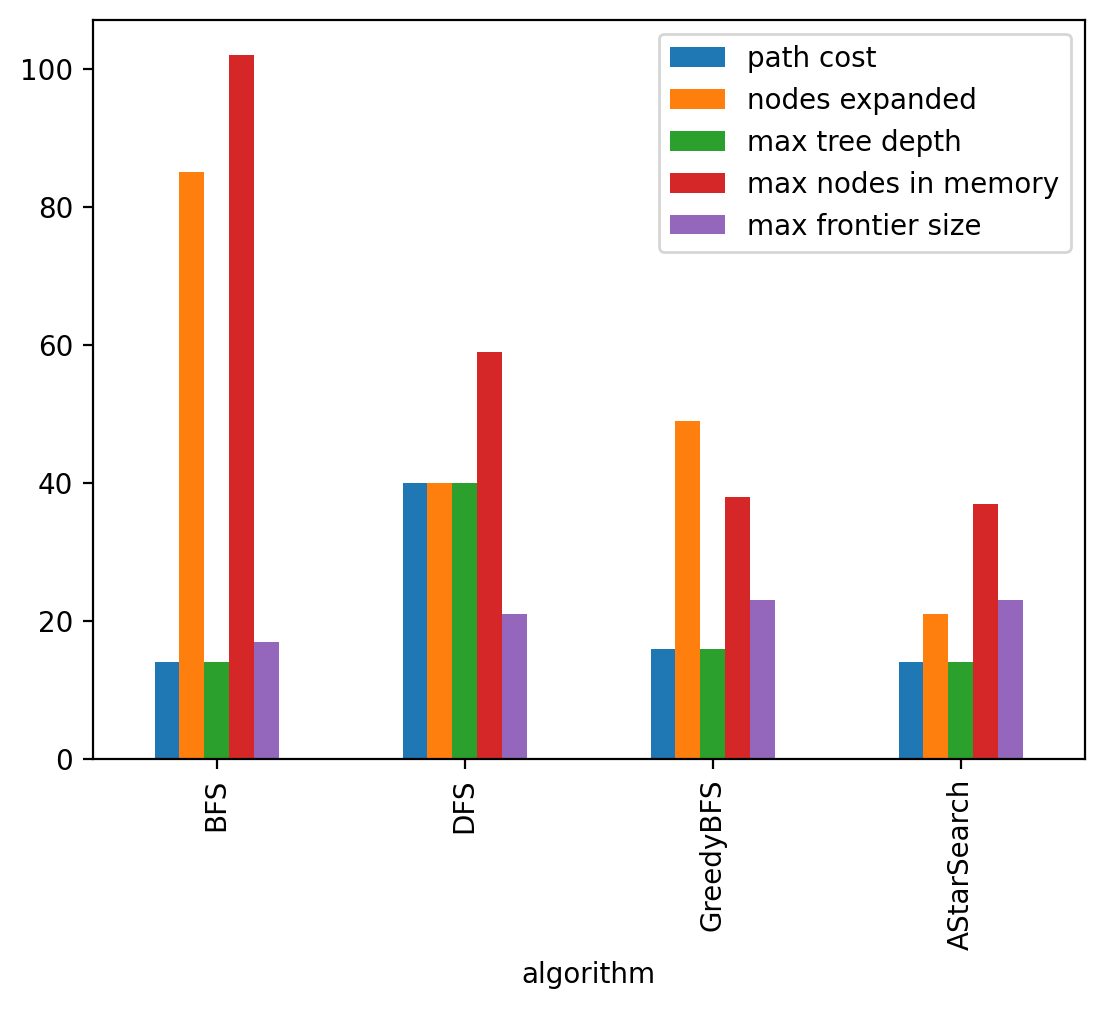

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
#we store them in panda data frames so that we can use matplotlib plots easily
#making sure to name them what we want the graphs to be called so that we can loop through them later.
import pandas as pd

open_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [54, 224, 56, 54],
    'nodes expanded': [679, 583, 2881, 174],
    'max tree depth': [53, 279, 56, 54],
    'max nodes in memory': [727, 351, 129, 154],
    'max frontier size': [48, 78, 74, 100]
})

empty_2_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [14, 44, 14, 14],
    'nodes expanded': [92, 47, 14, 14],
    'max tree depth': [14, 43, 14, 13],
    'max nodes in memory': [115, 62, 38, 34],
    'max frontier size': [23, 23, 25, 21]
})

empty_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [14, 40, 14, 14],
    'nodes expanded': [91, 40, 14, 14],
    'max tree depth': [14, 40, 14, 14],
    'max nodes in memory': [114, 73, 38, 33],
    'max frontier size': [23, 34, 24, 20]
})

large_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [210, 210, 210, 210],
    'nodes expanded': [618, 365, 455, 539],
    'max tree depth': [210, 211, 210, 209],
    'max nodes in memory': [626, 245, 231, 218],
    'max frontier size': [8, 35, 22, 13]
})

loops_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [23, 25, 23, 23],
    'nodes expanded': [70, 67, 1301, 139],
    'max tree depth': [22, 31, 31, 22],
    'max nodes in memory': [81, 35, 35, 35],
    'max frontier size': [11, 10, 17, 13]
})

L_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [14, 70, 20, 14],
    'nodes expanded': [136, 80, 47, 17],
    'max tree depth': [14, 70, 20, 14],
    'max nodes in memory': [171, 90, 40, 40],
    'max frontier size': [35, 24, 20, 26]
})

medium_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [68, 68, 152, 68],
    'nodes expanded': [265, 273, 157, 247],
    'max tree depth': [67, 193, 152, 67],
    'max nodes in memory': [274, 195, 159, 74],
    'max frontier size': [9, 8, 8, 12]
})

small_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [19, 19, 29, 19],
    'nodes expanded': [91, 33, 39, 37],
    'max tree depth': [19, 18, 29, 18],
    'max nodes in memory': [100, 24, 33, 26],
    'max frontier size': [9, 6, 5, 8]
})

wall_maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GreedyBFS', 'AStarSearch'],
    'path cost': [14, 40, 16, 14],
    'nodes expanded': [85, 40, 49, 21],
    'max tree depth': [14, 40, 16, 14],
    'max nodes in memory': [102, 59, 38, 37],
    'max frontier size': [17, 21, 23, 23]
})
mazes = [
    open_maze,
    empty_2_maze,
    empty_maze,
    large_maze,
    loops_maze,
    L_maze,
    medium_maze,
    small_maze,
    wall_maze
]

#make a list of the metrics in order to be able to loop through them instead of manually doing each one
metrics = ['path cost', 'nodes expanded', 'max tree depth', 'max nodes in memory', 'max frontier size']
# Plot each maze
for maze in mazes:
    maze.set_index('algorithm').plot(kind='bar')

Discuss the most important lessons you have learned from implementing the different search strategies.

One of the most important lessons I have learned from implementing these strategies is that DFS is very inconsistent, and sometimes finds a short path and sometimes finds a super long path. If there is only one right path, it works great, but in things like an open maze it performs terribly.

Another lesson I have learned is that the way you choose your heuristic is very important. For example, I at first had ties (where the heuristic is equal) simply random by the order they came in. However, this led to less than ideal searching, and so I added in that if the h(n) is tied to choose the shortest path for greedy seach since otherwise greedy would typically choose the longer path, although this leads to greedy searching a much larger state space. However, with A*, I chose to prioritize the larger cost since A* keeps track of the cost in the heuristic already, which made it much more effiecient.

Another lesson I learned is that you have to check if a node is already in the frontier, and decide what happens if so. In the case of DFS, I originally just didn't add the new node, but this leads to it taking forever. So I ended up removing the node from the frontier and adding the new node.

Another thing I learned is that when you check the order in a random way, DFS ends up choosing a very random path in open environments. If I had put it to a specific order, it would have looked much more ordered.



## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Implement IDS (iterative deepening search using DFS)

2. Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

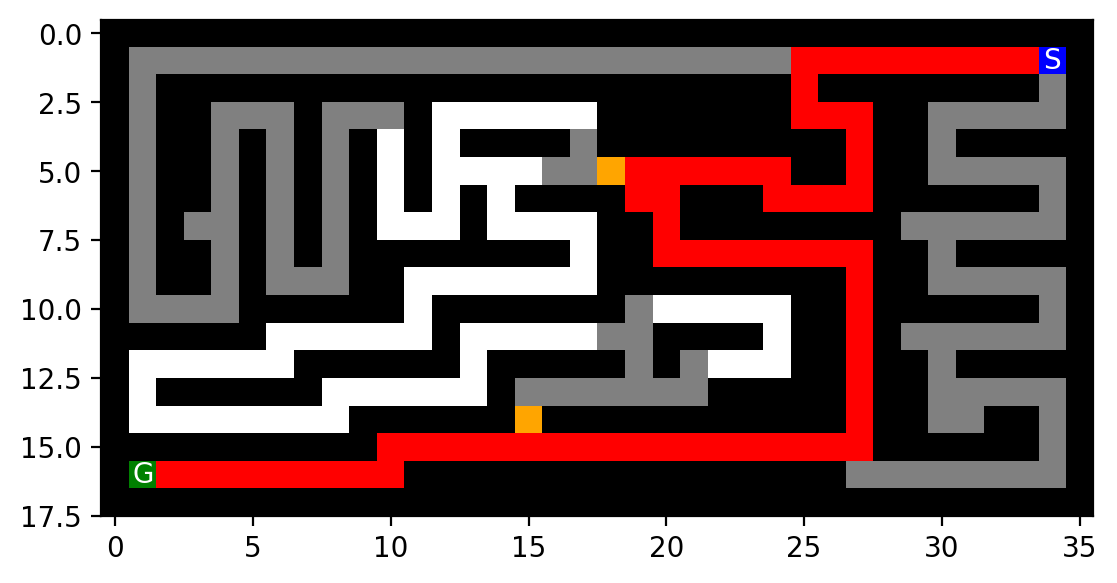

In [51]:

# Your code/answer goes here
def IterativeDeepeningSearch(maze,cutoffAmount = 40, showMap = False):
    for depth in range(cutoffAmount):
        result = DepthFirstSearch(maze,depth,showMap)
        if(result != False):
            return result
    return False

with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
answer = IterativeDeepeningSearch(maze,90,True)


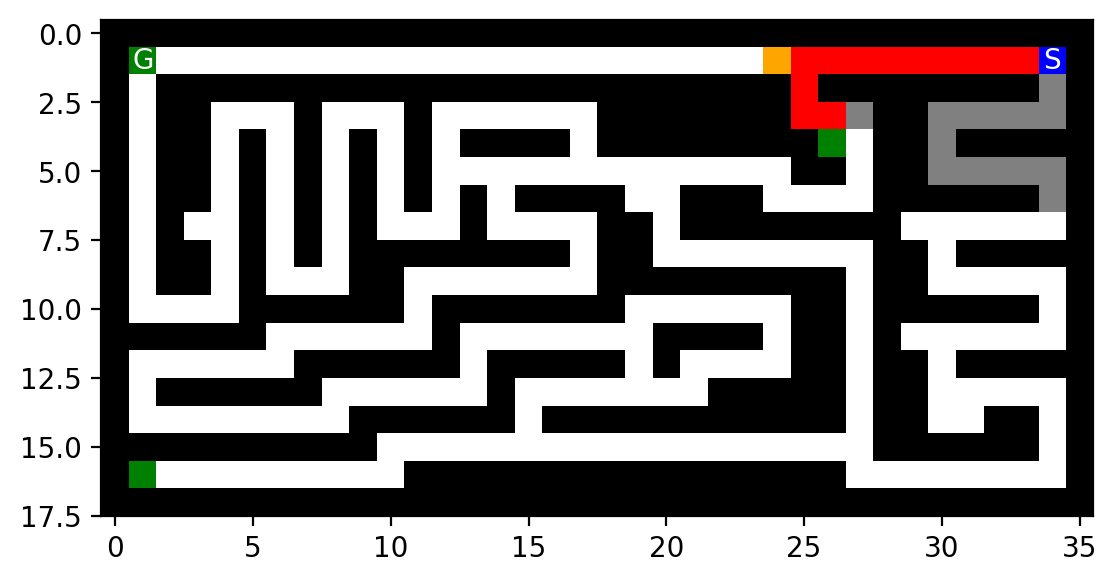

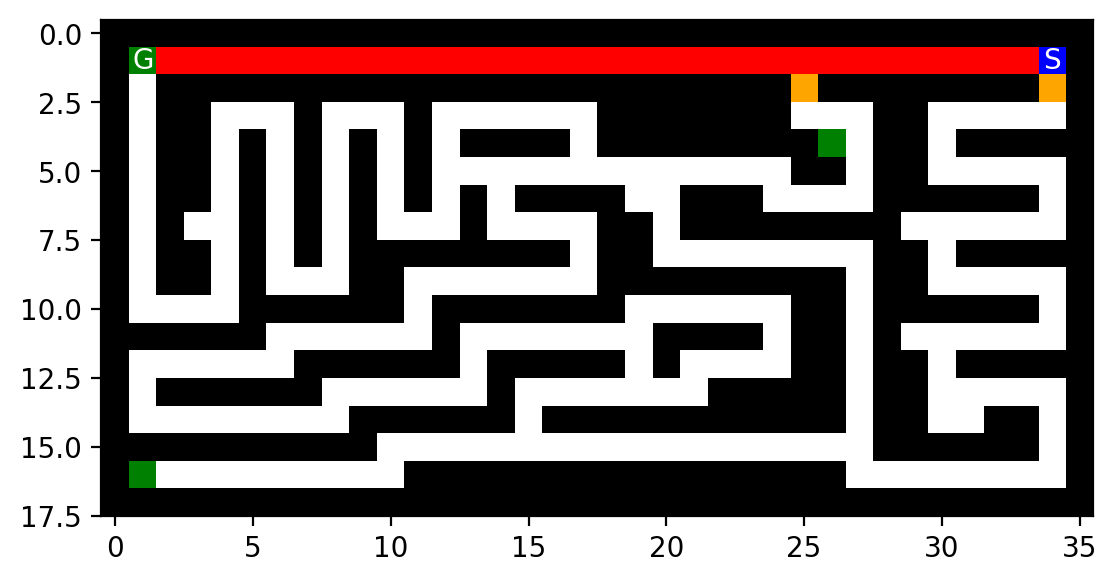

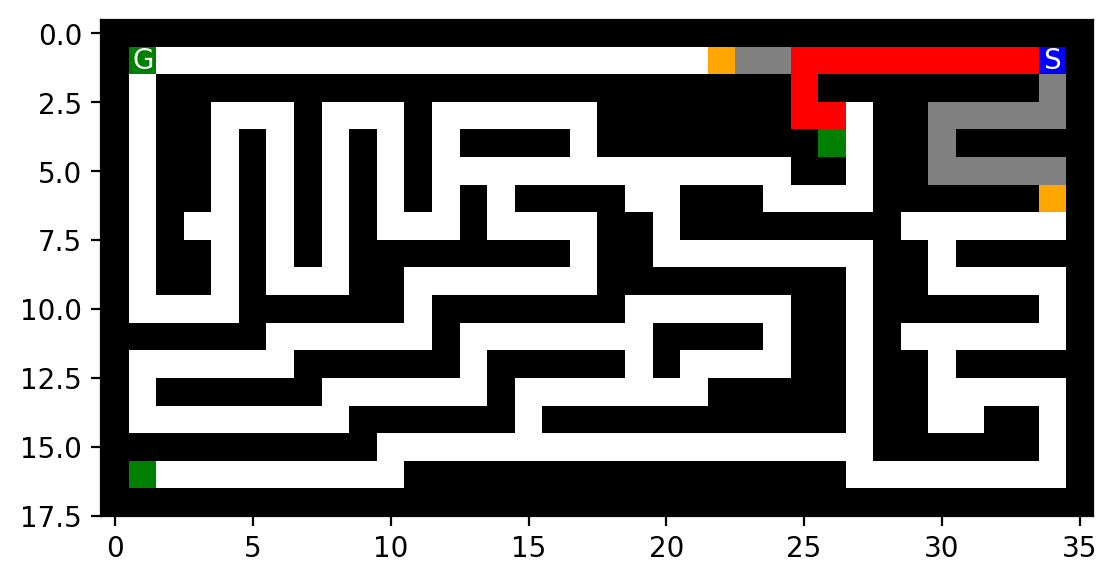

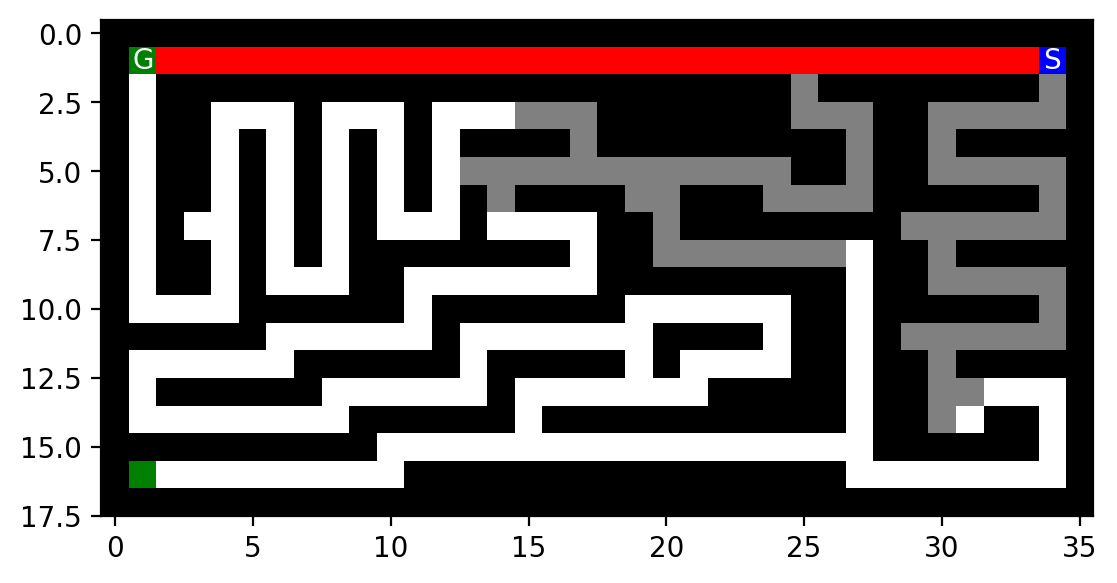

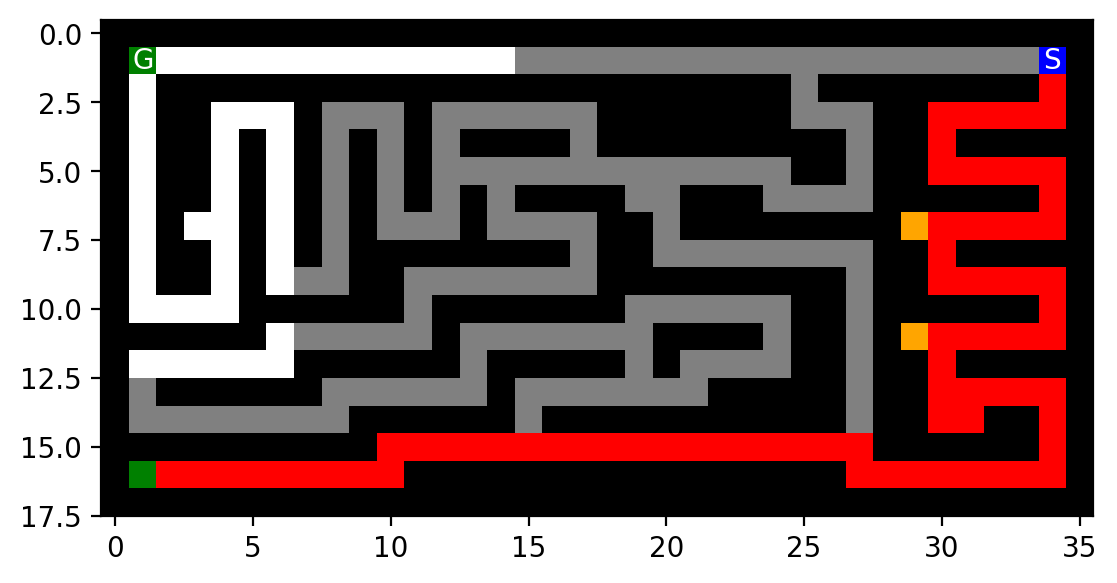

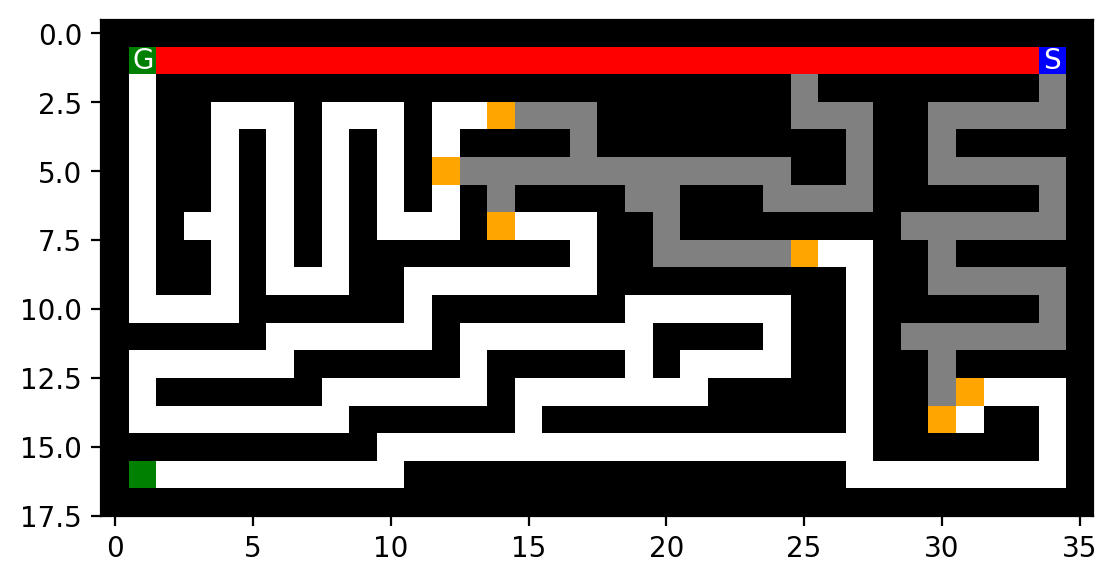

In [52]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
maze[(4,26)] = "G"
answer = IterativeDeepeningSearch(maze,90,True)
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
maze[(4,26)] = "G"
answer = DepthFirstSearch(maze,90,True)
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
maze[(4,26)] = "G"
answer = BreadthFirstSearch(maze,True)
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
answer = IterativeDeepeningSearch(maze,90,True)
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
answer = DepthFirstSearch(maze,90,True)
maze = mh.parse_maze(maze_str)
maze[(1,1)] = "G"
answer = BreadthFirstSearch(maze,True)


BFS and IDS will always find the best solution, because they check all possible squares at a certain depth that starts at 0 and increases. DFS, however, is not guarunteed to find the best solution because it just keeps going from the first node it chooses until it hits a goal or can't go anymore.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [53]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [54]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [55]:
# Your code/answer goes here